<a href="https://colab.research.google.com/github/jeong-jinuk/kisti_study/blob/master/titanic_kisti_%EC%B5%9C%EC%A2%85_191217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 사전 준비
- 구글 드라이브에 dataset 디렉토리 생성
- 데이터(*.csv)를 dataset에 업로드
- 구글 드라이브 마운트
- 작업 디렉토리 변경 

In [0]:
#colab - google drive mount
from google.colab import drive
drive.mount('gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [0]:
!pwd

/content


In [0]:
!ls -al './gdrive/My Drive'


total 580658
drwx------ 2 root root      4096 Jul 23 05:55  수업자료
drwx------ 2 root root      4096 Jul 15 13:05 '대장님영화(ㅇㄷㄱㅇ,ㅋㅁ,ㅌㅉ,ㅇㅌㅅㅌㄹ)'
drwx------ 2 root root      4096 Dec 10 07:12 'Colab Notebooks'
drwx------ 2 root root      4096 Oct 26 15:05  FSN
drwx------ 2 root root      4096 Dec 10 06:45  kisti_colab
-rw------- 1 root root 594572775 Nov 26 04:05  실습자료.zip


In [0]:
%cd "/content/gdrive/My Drive/kisti_colab/kisti-kaggle-competition-2"
!ls -al

/content/gdrive/My Drive/kisti_colab/kisti-kaggle-competition-2
total 4710
drwx------ 2 root root    4096 Dec 11 06:33 datasets
-rw------- 1 root root    2839 Dec 16 07:08 decision_tree.csv
-rw------- 1 root root  182819 Dec 16 07:08 타이타닉.ipynb
-rw------- 1 root root   58199 Dec 18 01:56 titanic_kisti_최종_191217.ipynb
-rw------- 1 root root 1336310 Dec 17 00:39 titanic_kisti_20191211.ipynb
-rw------- 1 root root 1593236 Dec 17 07:16 titanic_kisti_randomForest.ipynb
-rw------- 1 root root 1629126 Dec 18 00:47 titanic_kisti_randomForest_test.ipynb
-rw------- 1 root root    2839 Dec 17 06:20 titanic_submission.csv
-rw------- 1 root root    2839 Dec 17 09:01 titanic_submission_GB.csv
-rw------- 1 root root    2839 Dec 18 00:30 titanic_submissionGB.csv
-rw------- 1 root root    2839 Dec 17 09:01 titanic_submission_RF.csv
-rw------- 1 root root    2839 Dec 18 00:30 titanic_submissionRF.csv


In [0]:
!ls -al ./datasets

total 126
-rw------- 1 root root 34791 Dec 11 06:33 kisti-kaggle-competition-2.zip
-rw------- 1 root root  3258 Dec 11 06:33 sample_submission.csv
-rw------- 1 root root 28629 Dec 11 06:33 test.csv
-rw------- 1 root root 61194 Dec 11 06:33 train.csv


In [0]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [0]:
# kaggle 설치
#!pip install kaggle

In [0]:
# upload kaggle.json
#from google.colab import files
#files.upload()

In [0]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle
#!kaggle competitions list

In [0]:
# 다운로드 전에, 해당 competition에 join 해야 함
#!kaggle competitions download -c titanic

In [0]:
#!mv train.csv test.csv gender_submission.csv "/content/drive/My Drive/GoogleColab/kaggle_titanic/dataset/"

In [0]:
#!ls -al 
#!mkdir ./datasets
#!mv *.csv ./datasets/

In [0]:
#!head -5 ./datasets/gender_submission.csv
#!tail -f ./datasets/gender_submission.csv
#!wc -l ./datasets/gender_submission.csv


In [0]:
#!head -5 ./datasets/train.csv
#!tail -f ./datasets/train.csv
#!wc -l ./datasets/train.csv


In [0]:
#!head -5 ./datasets/test.csv
#!tail -f ./datasets/test.csv
#!wc -l ./datasets/test.csv

In [0]:
#!pip install missingno

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn scheme 설정
plt.style.use('seaborn')
# 그래프의 폰트 설정
sns.set(font_scale=1.5) 
# 데이터셋의 missing data 쉽게 보여주기
import missingno as msno

#ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

%matplotlib inline

- [참고] matplotlib style
  - https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

### 작업 내용
- 1) 데이터셋 확인
  - null data 와 같은 데이터를 확인 및 수정
- 2) 탐색적 데이터 분석(Exploratory Data Analysis)
  - 여러 feature들을 개별적으로 분석
  - feature들 간의 상관 관계 확인
  - 여러 시각화 도구들을 사용
- 3) Feature Engineering
  - 모델을 만들기 전, 모델 성능을 높이기 위한 feature들을 engineering
  - one-hot encoding, class로 나누기, text 데이터 처리 등
- 4) Model 만들기
  - sklearn을 사용하여 모델 만들기
  - tensorflow, pytorch 등 딥러닝 프레임워크 사용도 가능
- 5) 모델 학습 및 예측
  - train set 을 가지고 모델 학습
  - test set을 사용하여 prediction
- 6) 모델 평가
  - 학습된 모델에 대한 예측 성능 평가

## 1. Dataset 확인
- 데이터를 테이블화하여 다루는 것이 편리
- pandas를 사용
  - 간단한 통계적 분석부터 복잡한 처리들을 간단한 메소드를 사용하여 처리


In [0]:
WORK_DIR = './'
df_train = pd.read_csv(WORK_DIR + '/datasets/train.csv')
df_test = pd.read_csv(WORK_DIR + '/datasets/test.csv')

In [0]:
# 데이터 셋 살펴보기
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Features
- pclass : 클래스, Integer
- age : 나이, Integer
- sibsp : 형제와 배우자의 수, Integer
- parch : 부모와 아이의 수, Integer
- fare : 탑승료, Float
- survived : 생존여부, Integer (target label)


In [0]:
# 통계적 수치 보기
df_train.describe()
# 이 학습데이터는 실제 학습을 위한 데이터와 검증을 위한 데이터로 나눠서 저장해주어야 한다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### NULL 데이터 체크

In [0]:
# 학습 데이터 체크
for col in df_train.columns:
    print('column: {:>10}\t Percent of NULL value: {:.2f}%'.format(col, 
          100 * (df_train[col].isnull().sum() / df_train[col].shape[0])))

column: PassengerId	 Percent of NULL value: 0.00%
column:   Survived	 Percent of NULL value: 0.00%
column:     Pclass	 Percent of NULL value: 0.00%
column:       Name	 Percent of NULL value: 0.00%
column:        Sex	 Percent of NULL value: 0.00%
column:        Age	 Percent of NULL value: 19.87%
column:      SibSp	 Percent of NULL value: 0.00%
column:      Parch	 Percent of NULL value: 0.00%
column:     Ticket	 Percent of NULL value: 0.00%
column:       Fare	 Percent of NULL value: 0.00%
column:      Cabin	 Percent of NULL value: 77.10%
column:   Embarked	 Percent of NULL value: 0.22%


- Age(약 20%), Cabin(약 80%), Embarked(약 0.2%)의 null data 존재 확인

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
# 테스트 데이터 체크
for col in df_test.columns:
    print('column: {:>10}\t Percent of NULL value: {:.2f}%'.format(col, 
          100 * (df_test[col].isnull().sum() / df_test[col].shape[0])))

column: PassengerId	 Percent of NULL value: 0.00%
column:     Pclass	 Percent of NULL value: 0.00%
column:       Name	 Percent of NULL value: 0.00%
column:        Sex	 Percent of NULL value: 0.00%
column:        Age	 Percent of NULL value: 20.57%
column:      SibSp	 Percent of NULL value: 0.00%
column:      Parch	 Percent of NULL value: 0.00%
column:     Ticket	 Percent of NULL value: 0.00%
column:       Fare	 Percent of NULL value: 0.24%
column:      Cabin	 Percent of NULL value: 78.23%
column:   Embarked	 Percent of NULL value: 0.00%


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### MSNO 라이브러리를 사용하여 null data 확인

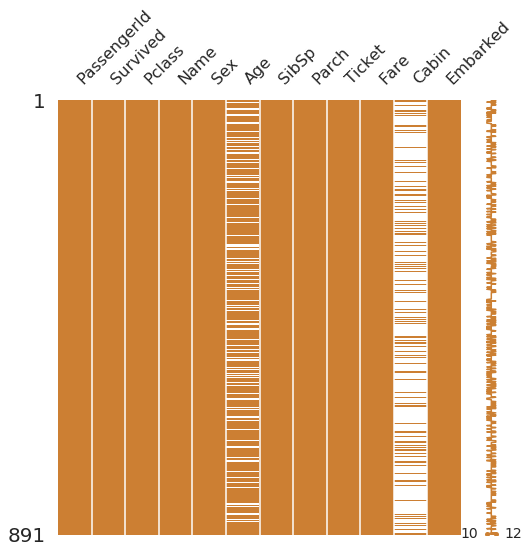

In [0]:
# null data 분포 확인
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

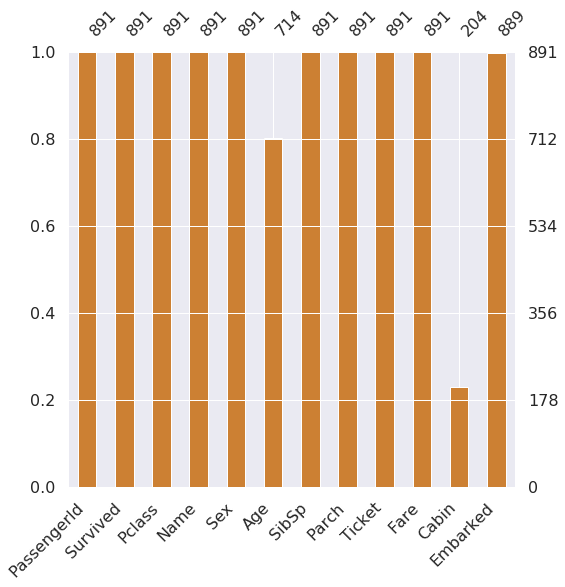

In [0]:
# null data 수로 확인
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### Target Label 확인
- target label 이 어떤 분포를 가지고 있는지 확인
- binary classification 같은 경우, 1과 0의 분포에 따라 모델 평가 방법이 달라질 수 있음

In [0]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

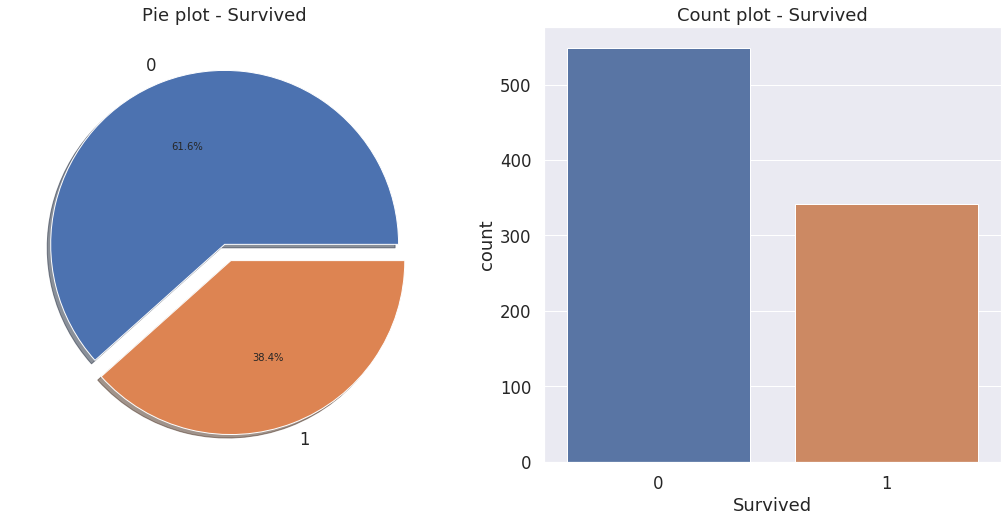

In [0]:
# 1행 2열 팔레트, 크기(세로:18, 가로:8)
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 파이 차트로 그리기
# value_counts() 의 data type은 series이며,
# series 타입은 plot을 가짐
# plt.plot(df_train['Survived'].value_counts()) 은 df_train[..]...plot()과 동일
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                           autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 38.4% 가 살아남음
- target label 의 분포가 어느 정도 균일(balanced)함


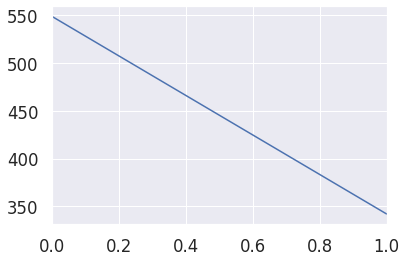

In [0]:
df_train['Survived'].value_counts().plot()

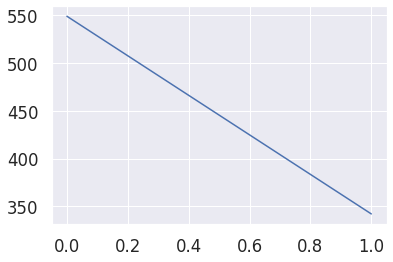

In [0]:
plt.plot(df_train['Survived'].value_counts())

- [참고] plotly

## 2. Exploratory Data Analysis (EDA, 탐색적 데이터 분석)

In [0]:
# 11개의 feature, 1개의 target label 
df_train.shape

(891, 12)

### Pclass (클래스)
- ordinal, 서수형 데이터, 카테고리형, 순서 있음
- pclass에 따른 생존률 차이 살펴보기
  - pandas의 group by 사용

In [0]:
# Pclass 별 항목 갯수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [0]:
# Pclass별 생존자 수
# P1(136/216), P2(87/184), P3(119/491)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [0]:
# crosstab 으로 확인
pd.crosstab(df_train['Pclass'], df_train['Survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


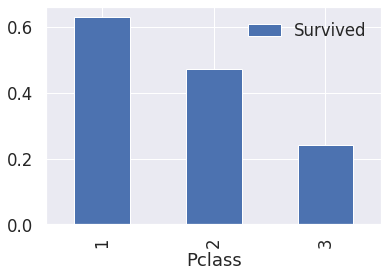

In [0]:
# 클래스별 생존률
# P1 : (136 / (80+136)) => 63%
df_train[['Pclass', 'Survived']].groupby(['Pclass'], 
             as_index=True).mean().sort_values(by='Survived', 
                                   ascending=False).plot.bar()

- Pclass가 좋을 수록 생존률이 높음

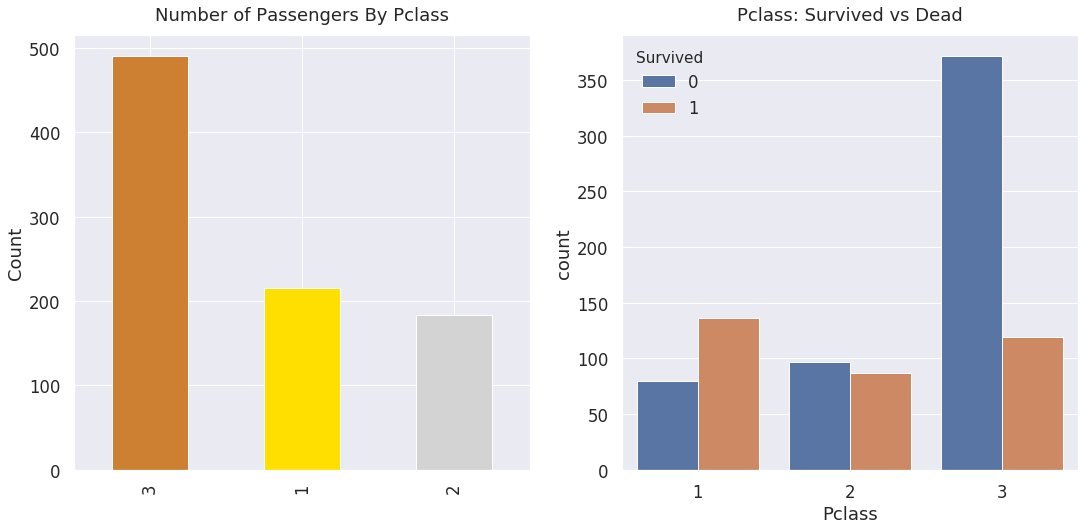

In [0]:
# label에 따른 갯수 확인
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을 수록(1st class) 생존 확률이 높음
  - P1(63%), P2(48%), P3(25%)
- 생존에 Pclass가 큰 영향을 미친다고 생각할 수 있음
  - 모델을 만들 때, Pclass feature를 사용하는 것이 좋을 것이라 판단할 수 있음

### 성별(Sex)
- 성별로 생존률 확인
- pandas groupby와 seaborn countplot 사용


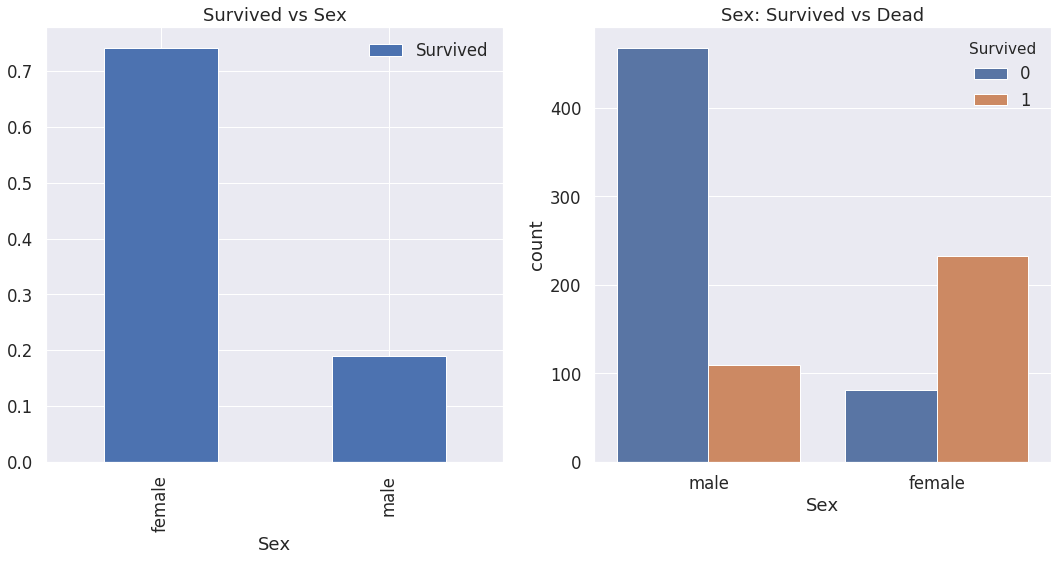

In [0]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], 
                          as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- female(여성)이 생존할 확률이 높음

In [0]:
df_train[['Sex', 'Survived']].groupby(['Sex'], 
            as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
# crosstab 으로 확인
pd.crosstab(df_train['Sex'], df_train['Survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex도 예측 모델에 중요한 feature 임을 알 수 있음

### Pclass 와 Sex
- Pclass와 Sex 두 feature에 대한 생존 확률 확인

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


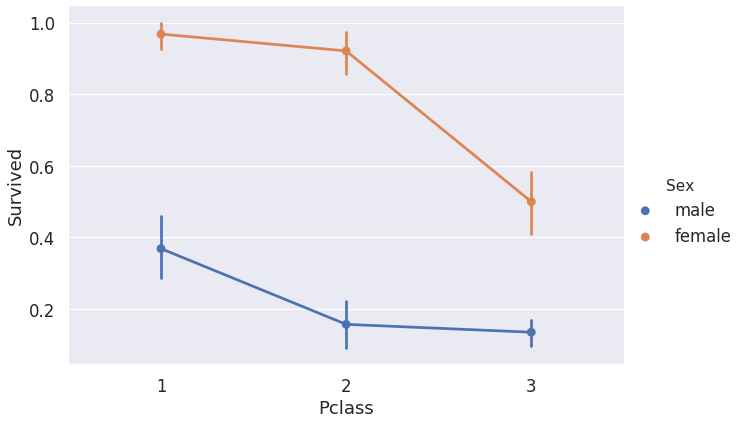

In [0]:
# 3개의 차원 데이터로 이루어진 그래프 그리기
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

- 모든 클래스에서 female이 생존할 확률이 male 보다 높음
- 남, 여 상관없이 클래스가 높을 수록 생존 확률이 높음

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


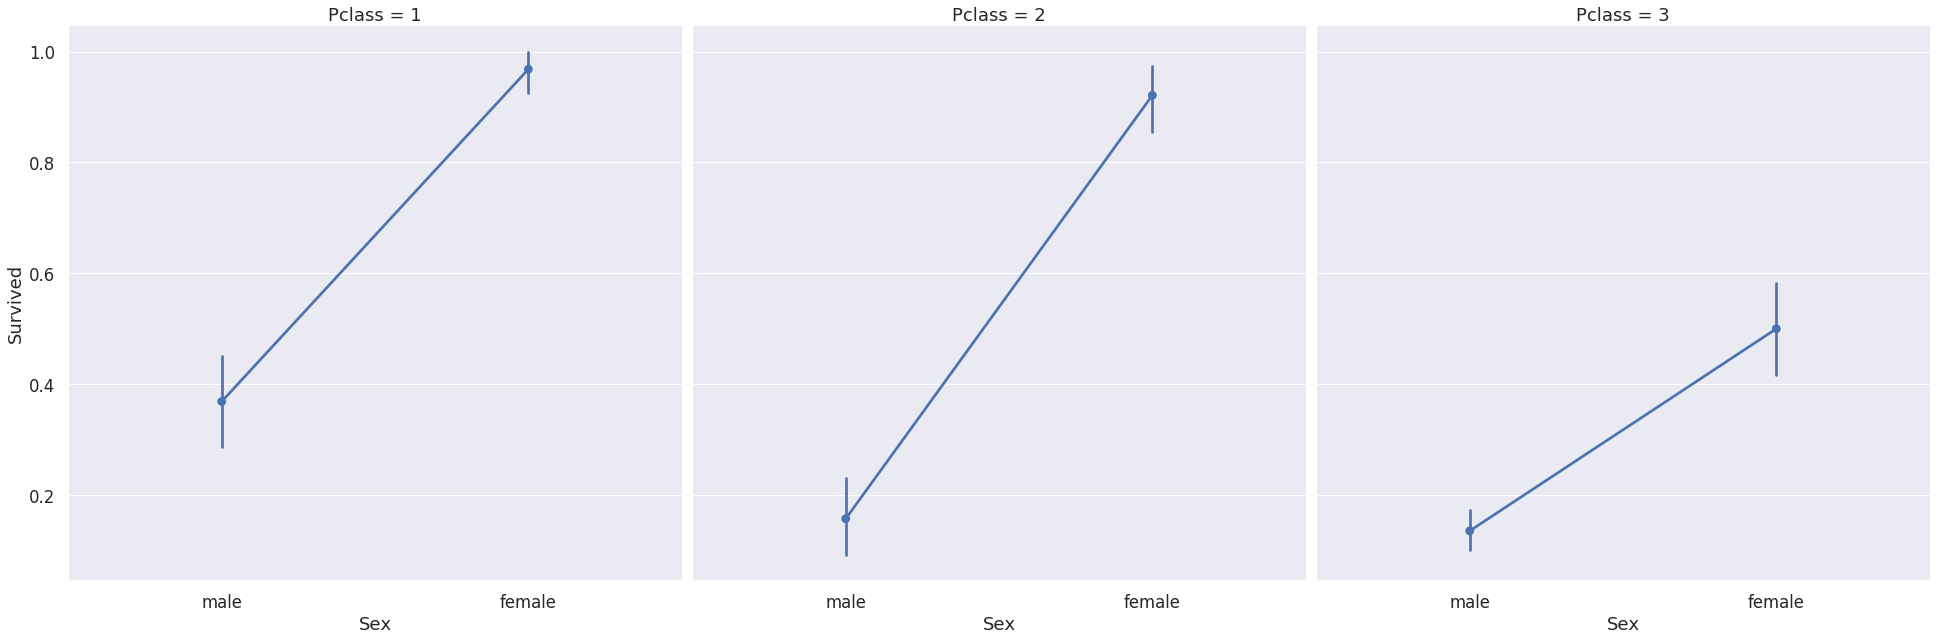

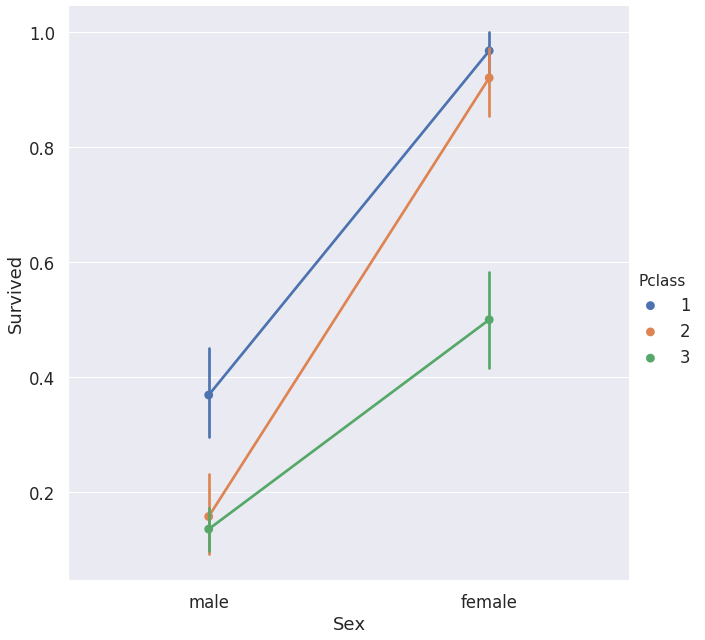

In [0]:
# cloumn 대신 hue 사용
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1)
sns.factorplot(x='Sex', y='Survived', hue='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1)

- [찾아보기] error bar

### Age
- 나이에 따른 생존 확률 확인

In [0]:
# 간단한 통계 보기
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


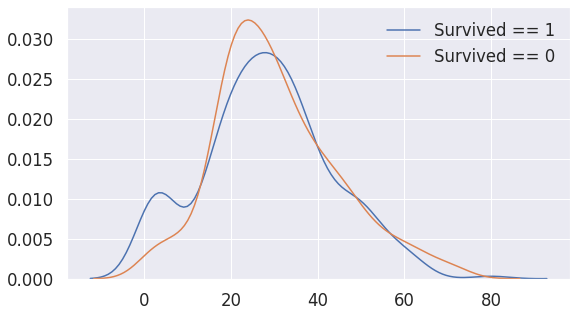

In [0]:
# 생존에 따른 Age의 히스토그램
# kdeplot()
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 나이가 어릴 수록 생존률이 높음

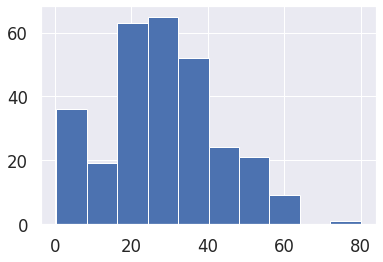

In [0]:
# 히스토그램 vs. kdeplot()
# kdeplot()이 부드럽게 그림
# (참고) 커널밀도추정 https://blog.naver.com/loiu870422/220660847923
df_train[df_train['Survived']==1]['Age'].hist()

In [0]:
# pandas indexing
df_train.iloc[0,:]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [0]:
for row in df_train.iterrows():
  break
row

(0, PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                                 22
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [0]:
df_train['Survived'] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [0]:
df_train[df_train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


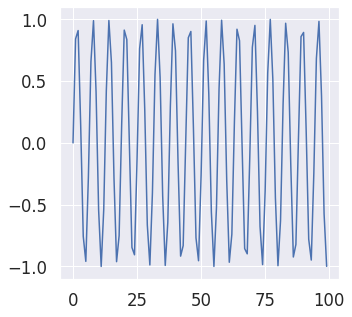

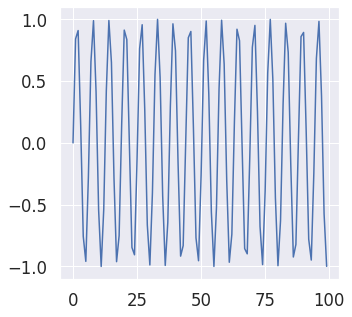

In [0]:
# figsize
# 아래 세 예제는 동일
#f = plt.figure(figsize=(10,10))
#f, ax = plt.subplots(1,1,figsize=(10,10))
#plt.figure(figsize=(10,10))
f, ax = plt.subplots(1,1,figsize=(5,5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b)

plt.figure(figsize=(5,5))
plt.plot(b)

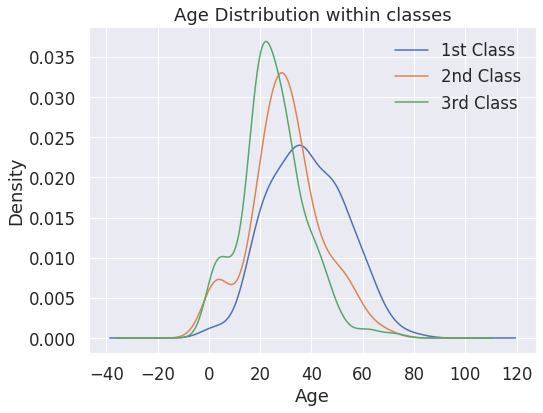

In [0]:
# Pclass와 Age 로 확인
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


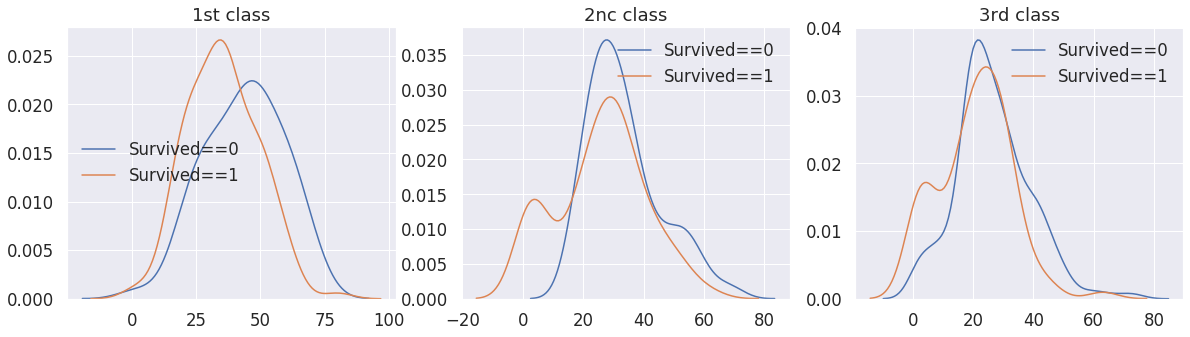

In [0]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==1)]['Age'], ax=ax[0])
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==1)]['Age'], ax=ax[0])
ax[0].set_title('1st class')
ax[0].legend(['Survived==0', 'Survived==1'])   
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'], ax=ax[1])
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'], ax=ax[1])
ax[1].set_title('2nc class')
ax[1].legend(['Survived==0', 'Survived==1'])   
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'], ax=ax[2])
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'], ax=ax[2])
ax[2].set_title('3rd class')
ax[2].legend(['Survived==0', 'Survived==1'])                               
plt.show()


- Class가 높을 수록 나이 많은 사람의 비중이 커짐

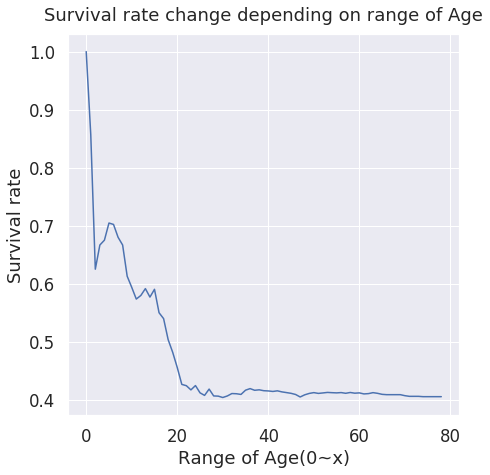

In [0]:
# 나이 범위에 따른 생존률
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age'] < i]['Survived'].sum() / 
        len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존 확률이 높음
- Age는 중요한 feature 임을 알 수 있음

### Pclass, Sex, Age
- Pclass, Sex, Age 세 개의 feature에 대한 시각화
- seaborn violinplot 사용
  - x축 : 나누어 보고 싶은 case (Pclass, Sex)
  - y축 : 보고 싶은 distribution (Age)

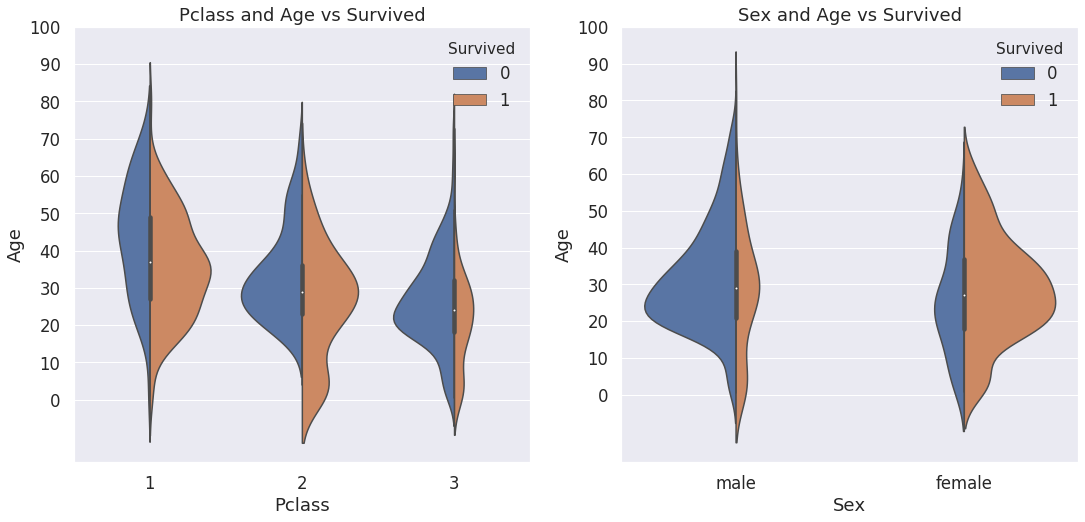

In [0]:
# scale='count', scale='area'
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', 
               split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', 
               split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림: Pclass 별로 Age의 분포가 어떻게 다른지, 생존 여부에 따라 구분한 그래프
- 오른쪽 그림: Sex, Age에 따른 생존 여부
- 모든 클래스에서 나이가 어릴 수록 생존률이 높음
- 오른쪽 그림에서, female 이 생존률이 높음
- 여성과 아이를 먼저 챙긴 것을 알 수 있음

### Embarked
- 탑승한 항구에 따른 생존률 확인

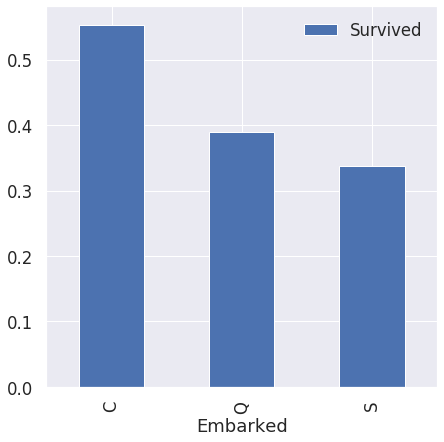

In [0]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], 
              as_index=True).mean().sort_values(by='Survived', 
                                      ascending=False).plot.bar(ax=ax)

- 생존률이 비슷

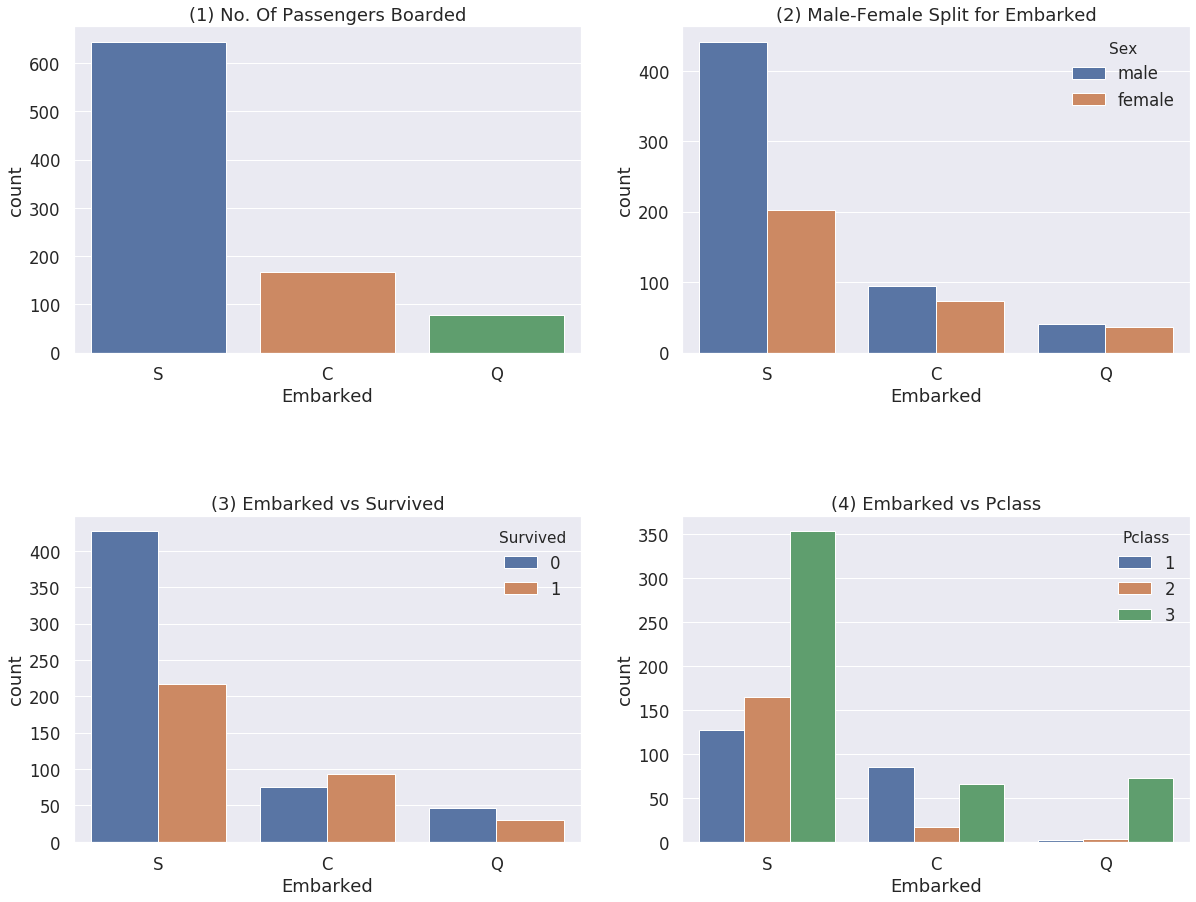

In [0]:
# 다른 feature로 split하여 확인
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure 1: S에서 가장 많은 사람이 탑승
- Figure 2: C와 Q는 남녀 비율이 비슷, S는 남자가 더 많음
- Figure 3: S가 생존확률이 가장 낮음
- Figure 4: C가 생존 확률이 높음. 클래스가 높은 사람이 많이 탄 이유. S는 3rd class가 많아서 생존 확률이 낮음

### Family
- SibSp(형제 자매)
- Parch(부모, 자녀)

In [0]:
# 새로운 컬럼(Family) 추가
# series 타입은 서로 더할 수 있음
# 자신을 포함하기 위해 1을 더함
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


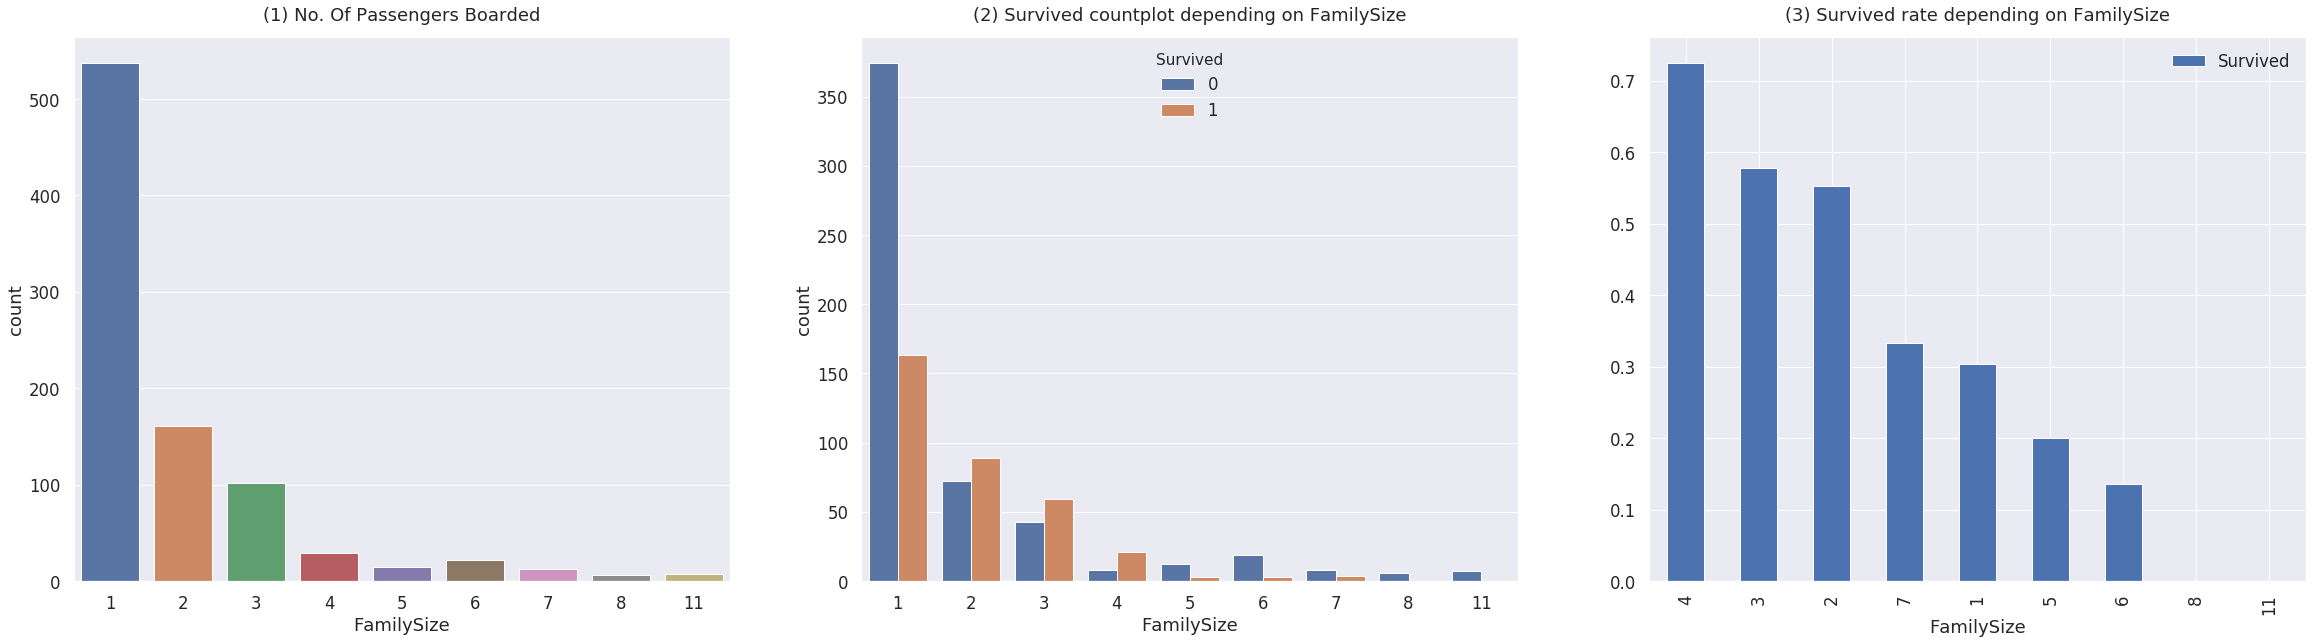

In [0]:
# Family 크기와 생존 관계
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                    as_index=True).mean().sort_values(by='Survived', 
                                         ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure 1: 가족 크기는 1 ~ 11. 대부분 1명, 그 다음은 2~4명
- Figure 2, 3: 
  - 가족이 4명인 경우 생존 확률이 가장 높음
  - 가족 수가 많아질 수록 생존 확률이 낮아짐
  - 가족 수가 너무 작거나, 너무 커도 생존 확률이 낮음
  - 가족 수 3~4명이 생존 확률이 높음

### Fare (탑승 요금)
- continuous feature


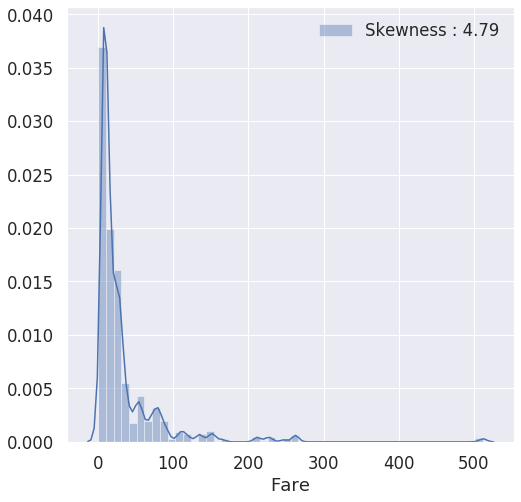

In [0]:
# histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 비대칭 (high skewness)
  - 이대로 모델에 넣어 줄 경우, 모델이 잘못 학습할 수 있음
  - outlier에 민감하게 반응한다면 예측시에 좋지 못한 결과를 부름
- outlier의 영향을 줄이기 위해 Fare에 log 적용
- pandas DataFrame의 특정 컬럼에 공통된 작업(함수)을 적용하는 경우,  map 또는 apply 사용


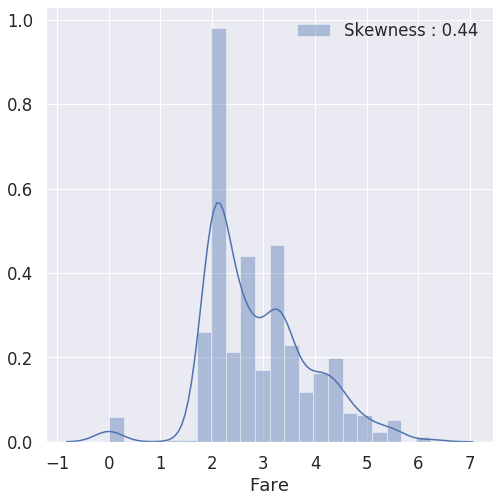

In [0]:
# NULL값 치환
df_train.loc[df_train.Fare.isnull(), 'Fare'] = df_train['Fare'].mean()
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
            label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하니, 비대칭성이 많이 사라짐
- feature engineering 적용
- 모델을 학습시키고, 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 작업

### Cabin
- NaN 이 약 80%
- 생존에 영향을 미칠 중요한 정보를 얻어내기는 쉽지 않음
- 모델에 포함하지 않는 것이 좋음

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### Ticket
- 다양한 문자열이 많음
- 모델에 적용하기 위해서 다양한 아이디어 필요

In [0]:
df_train['Ticket'].value_counts()


CA. 2343             7
1601                 7
347082               7
3101295              6
347088               6
                    ..
35851                1
SO/C 14885           1
8471                 1
SOTON/O.Q. 392087    1
STON/O 2. 3101294    1
Name: Ticket, Length: 681, dtype: int64

- ticket number 가 매우 다양함
- 일단, 제외
- [참고] 참고한 사이트
  - https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python, https://www.kaggle.com/startupsci/titanic-data-science-solutions, https://www.kaggle.com/ash316/eda-to-prediction-dietanic, https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 

## 3. Feature Engineering
- dataset에 존재하는 null data 채우기
- null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어 필요
- 모델의 성능에 영향을 주는 중요한 작업
- train 뿐만 아니라 test dataset에도 동일하게 적용해야 함

### Age의 NULL 처리
- Age에는 null 데이터가 177개나 존재
- title과 statistics를 사용하여 채워보기
  - Miss, Mrr, Mrs 사용
- pandas의 str.extract()를 사용하여 title 추출 (정규표현식 사용)

In [0]:
df_train['Age'].isnull().sum()

177

In [0]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [0]:
df_train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [0]:
# initial 항목으로 추출
df_train['Initial']=0
for i in df_train:
    df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') 
    
df_test['Initial']=0
for i in df_test:
    df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [0]:
# Sex와 Initial에 대한 crosstab 확인
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
# 위 테이블을 참고하여,
# initial 치환
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                          'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                       'Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                          'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [0]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [0]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


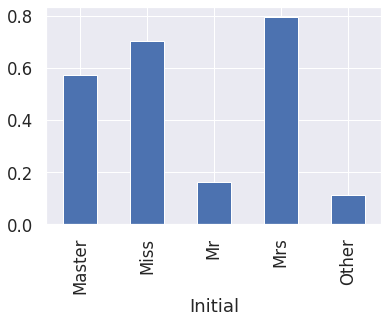

In [0]:
# 생존률 확인
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- 어린 아이(Master)와 여성과 관계 있는 Miss, Mrs가 생존률이 높음

#### train, test 전체 셋을 사용하여 Age의 null 값 처리
- pandas의 concat을 이용하여 dataframe을 합침


In [0]:
df_all = pd.concat([df_train, df_test])
df_all

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Age,Cabin,Embarked,FamilySize,Fare,Initial,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,2,1.981001,Mr,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,2,4.266662,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,1,2.070022,Miss,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,2,3.972177,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,1,2.085672,Mr,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,1,2.085672,Mr,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,1,4.690430,Mr,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,1,1.981001,Mr,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,1,2.085672,Mr,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [0]:
df_all.reset_index(drop=True)

,Age,Cabin,Embarked,FamilySize,Fare,Initial,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,2,1.981001,Mr,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,2,4.266662,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,1,2.070022,Miss,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,2,3.972177,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,1,2.085672,Mr,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,1,2.085672,Mr,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,1,4.690430,Mr,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,1,1.981001,Mr,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,1,2.085672,Mr,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [0]:
df_all.groupby('Initial').mean()

,Age,FamilySize,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Initial,,,,,,,,
Master,5.482642,4.426230,3.262225,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.834533,2.147170,3.065227,0.494340,616.992453,2.332075,0.652830,0.704301
Mr,32.556397,1.446174,2.680701,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,2.482412,3.488188,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,1.384615,2.951897,0.153846,714.923077,1.615385,0.230769,0.111111


- Age의 평균을 이용하여 Null 값 채우기
  - Mr인 경우, Age 값을 33으로 치환
- loc + boolean + column을 사용하여 값을 치환하는 방법
- [참고] 다른 방법 참고:
  - https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

In [0]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=37
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=45

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age']=33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age']=37
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age']=5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age']=45

In [0]:
df_train['Age'].isnull().sum()

0

In [0]:
df_test['Age'].isnull().sum()

0

#### Embarked의 Null 값 처리
- null 값이 2개 있으며, S에서 탑승객이 가장 많음므로 null을 S로 채움
- dataframe의 fillna() 사용

In [0]:
df_train['Embarked'].isnull().sum()

2

In [0]:
df_train.shape

(891, 14)

In [0]:
df_train['Embarked'].fillna('S', inplace=True)

### Age 변환
- continus 값을 categorical 값으로 변환
  - 정보 손실이 있을 수 있으므로 주의가 필요
- Age를 몇 개의 group으로 나누어서 category화 시킴
- dataframe의 loc 또는 apply() 사용

In [0]:
df_train['Age_cat'] = 0

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [0]:
# loc 이용
# 10살 간격으로 나누기
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [0]:
# apply() 함수 사용한 방법
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3,3


In [0]:
# 두 가지 방법의 비교
# all() : 모두 True 일 때, True
# any() : 하나라도 True이면 True
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [0]:
# Age 컬럼 삭제
# axis=1
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

### Initial 변경
- Mr, Mrs, Miss, Master, Other 로 구성
- 카테고리로 표현되어져 있는 데이터를 컴퓨터가 인식할 수 있도록 수치화
- map() 사용

In [0]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [0]:
df_train['Initial'] = df_train['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_train.Initial.unique() 

array([2, 3, 1, 0, 4])

In [0]:
df_train.Initial.unique()

array([2, 3, 1, 0, 4])

### Embarked 변경
- S, C, Q로 구성

In [0]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [0]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [0]:
# null 확인
df_train['Embarked'].isnull().any()

False

### Sex 변경
- male, female 로 구성

In [0]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [0]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [0]:
df_train['Sex'].unique()

array([1, 0])

#### Pearson Correlation
- feature 들 간의 상관 관계 알아보기
- (-1, 1) 사이의 값
  - -1로 갈수록 음의 상관 관계
  - 1로 갈수록 양의 상관 관계
  - 0 : 상관 관계가 없음
- matrix 형태의 heatmap plot 사용

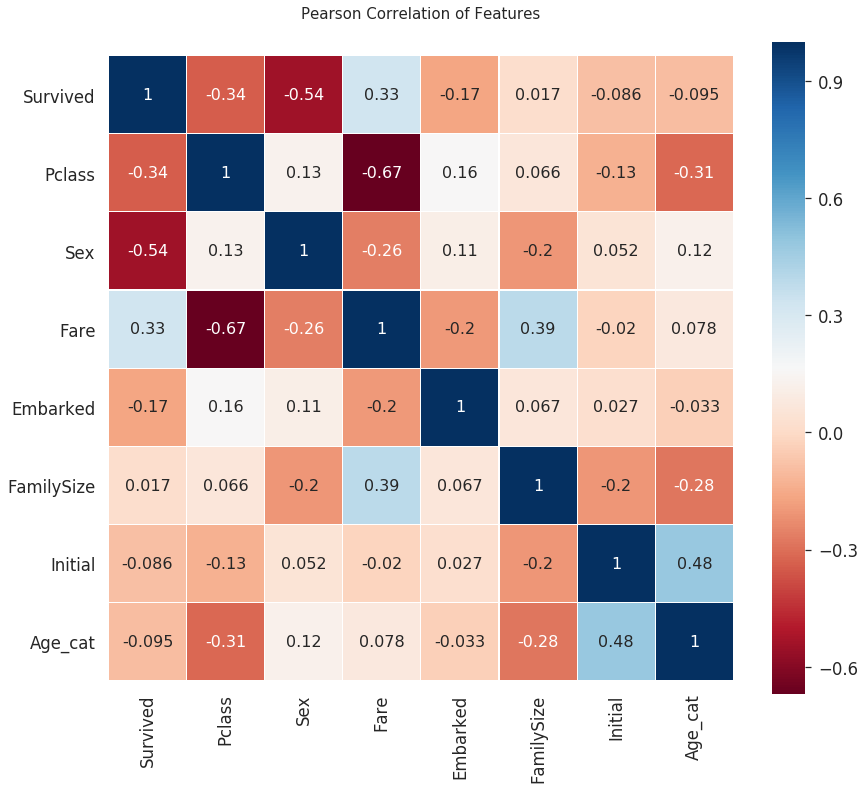

In [0]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 
                         'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, 
            annot_kws={"size": 16})

del heatmap_data

- Sex, Pclass와 Survived에 상관 관계가 어느 정도 있음
- Pclass와 Age_cat, Age_cat과 Initial 은 상관 관계 있음
- 서로 강한 상관 관계를 가지는 feature들은 없음
  - 모델을 학습시킬 때, 불필요한 feature는 없음을 의미 (redundant, superfluous feature 들)
  

## One-hot encoding
- 카테고리 데이터를 (0, 1)로 이루어진 N차원 벡터로 나타내는 것
- pandas.get_dummies() 사용

### Initial 을 One-hot encoding으로 만들기

In [0]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


### Embarked를 one-hot encoding



In [0]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


## Drop columns 
- 불필요한 컬럼들 지우기


In [0]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [0]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [0]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


## 4. 모델 만들기
- sklearn 사용
  - feature engineering, preprocessing, 지도 학습 알고리즘, 비지도 학습 알고리즘, 모델 평가, 파이프 라인 등 구현
- titanic 문제
  - target class : Survived
    - 0, 1 로 이루어진 binary classification 문제
  - train set의 Survived 항목을 제외한 입력을 가지고, 모델을 최적화시켜서 각 샘플(탑승객)의 생존 유무를 판단하는 모델 만들기
  - 모델이 학습하지 않은 test set을 입력으로 주어서 test set의 각 샘플(탑승객)의 생존 유무 예측

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split

### 준비 - 데이터 셋을 train, valid, test set으로 나누기
- 보통은 train, test set으로 나누지만, valid set으로 모델 평가
  - train : 팀 훈련
  - valid : 평가전
  - test : 대회

In [0]:
# 학습에 쓰일 데이터와 target label 분리
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [0]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=1213)

- [참고] 머신러닝 알고리즘
  - http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

- 랜덤 포레스트 모델
  - 결정 트리 기반 모델
  - 여러 결정 트리들을 앙상블한 모델
  - 파라미터
    - n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf
  - 파라미터 튜닝에 따라 모델 성능이 달라짐
  

### 모델 생성 및 예측
- RandomForestClassifier()
- fit()
- predict()

In [0]:
# 학습
model_GB = GradientBoostingClassifier(n_estimators=1756,random_state=670,max_depth=4,max_features='sqrt',learning_rate=0.002)
model_GB.fit(X_tr, y_tr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.002, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1756,
                           n_iter_no_change=None, presort='auto',
                           random_state=670, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
# 학습
model_RF = RandomForestClassifier(n_estimators=1756,random_state=670,class_weight='balanced',max_depth=4,max_features='sqrt')
model_RF.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1756, n_jobs=None, oob_score=False,
                       random_state=670, verbose=0, warm_start=False)

In [0]:
# 예측
prediction_GB = model_GB.predict(X_vld)

In [0]:
# 예측
prediction_RF = model_RF.predict(X_vld)

In [0]:
prediction_GB

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1])

In [0]:
prediction_RF

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1])

In [0]:
# 정확도
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction_GB, y_vld)))

총 268명 중 83.96% 정확도로 생존을 맞춤


In [0]:
# 정확도
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction_RF, y_vld)))

총 268명 중 83.96% 정확도로 생존을 맞춤


In [0]:
print(X_tr.shape)
print(X_vld.shape)

(623, 13)
(268, 13)


In [0]:
(prediction_GB == y_vld).sum()/prediction_GB.shape[0]

0.8059701492537313

In [0]:
(prediction_RF == y_vld).sum()/prediction_RF.shape[0]

0.8395522388059702

### Feature Importance
- 학습된 모델은 feature importance를 가짐
- 만든 모델이 어떤 feature에 영향을 많이 받는지 확인할 수 있음
- pandas series 사용

In [0]:
model_GB.feature_importances_

array([0.0718384 , 0.20332248, 0.23773322, 0.13769282, 0.08047129,
       0.00671759, 0.00864373, 0.19935599, 0.00929521, 0.00928556,
       0.01494881, 0.0076609 , 0.01303402])

In [0]:
model_RF.feature_importances_

array([0.0936314 , 0.22416895, 0.11812563, 0.06697249, 0.0364042 ,
       0.01553987, 0.06499745, 0.27706953, 0.07030539, 0.00511838,
       0.00912358, 0.00830044, 0.0102427 ])

In [0]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [0]:
from pandas import Series
feature_importance_GB = model_GB.feature_importances_
feature_importance_RF = model_RF.feature_importances_
Series_feat_imp_GB = Series(feature_importance_GB, index=df_test.columns)
Series_feat_imp_RF = Series(feature_importance_RF, index=df_test.columns)

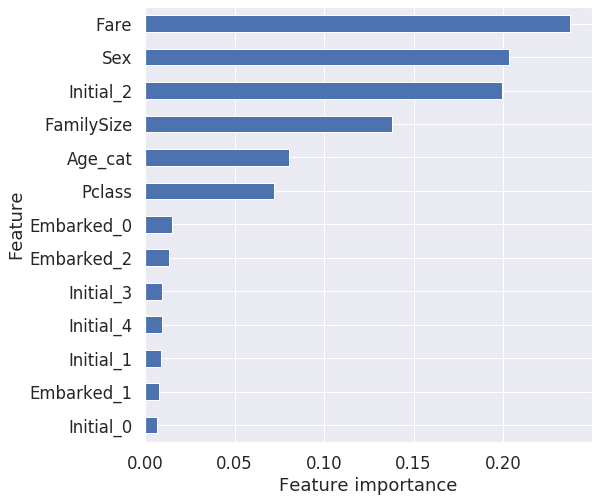

In [0]:
plt.figure(figsize=(8, 8))
Series_feat_imp_GB.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

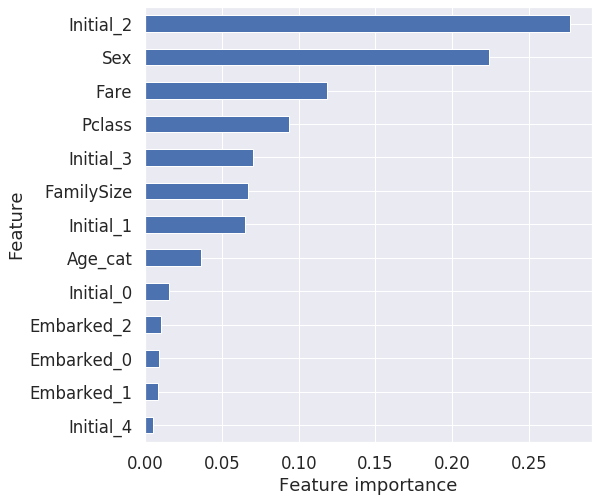

In [0]:
plt.figure(figsize=(8, 8))
Series_feat_imp_RF.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- Fare가 가장 큰 영향력을 가짐. 그 뒤에 Initial_2, Age_cat, Pclass 순으로 중요도를 가짐
- Fare가 중요한 feature일 수 있다고 판단을 내릴 수도 있지만, 결국 모델에 귀속되는 하나의 결론임. 통계적으로 더 살펴봐야 함
- 좀 더 정확도 높은 모델을 얻기 위해 feature selection을 할 수도 있고, 좀 더 빠른 모델을 만들기 위해서는 feature를 제가할 수도 있음

### Test Set을 사용하여 Prediction
- 모델을 학습하지 않았던 테스트 셋으로 생존 여부 예측
- 캐글에서 준 파일 gender_submission.csv 을 사용하여 제출 준비


In [0]:
WORK_DIR = './'
submission_RF = pd.read_csv(WORK_DIR + '/datasets/sample_submission.csv')
submission_GB = pd.read_csv(WORK_DIR + '/datasets/sample_submission.csv')

In [0]:
submission_RF.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
submission_GB.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


#### test set에 대하여 예측하고, 결과를 csv에 저장

In [0]:
prediction_GB = model_GB.predict(X_test)
submission_GB['Survived'] = prediction_GB

submission_GB.to_csv('./titanic_submission_GB.csv', index=False)

In [0]:
prediction_RF = model_RF.predict(X_test)
submission_RF['Survived'] = prediction_RF

submission_RF.to_csv('./titanic_submission_RF.csv', index=False)

In [0]:
#!head -20 ./titanic_submission.csv

### 캐글에 제출하기
- kaggle.com 접속
- Commit
- OUTPUT
- Submit to Competition


In [0]:
#from google.colab import files
#files.download("./titanic_submission.csv")

In [0]:
#!kaggle competitions submit -c titanic -f titanic_submission.csv -m t20191210_01

# NEXT...
- Feature Engineering
  - Fare에 log() 적용했던 부분을 취소하고 commit 수행
    - 결과는 더 안 좋아짐 확인!
    
  

- [참고]
  - https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python, https://www.kaggle.com/startupsci/titanic-data-science-solutions, https://www.kaggle.com/ash316/eda-to-prediction-dietanic, https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 